In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, label_binarize

In [95]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, 
                        cv=None,
                        n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring='accuracy',
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    '''# Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")'''

    return plt

In [223]:
def dtree_grid_search(X, y, X_test, y_test, alpha, nfolds):
    param_grid = {'criterion':['gini','entropy'], 
                  'max_depth': np.arange(3, 10)}
    dtree_model=tree.DecisionTreeClassifier(ccp_alpha=alpha)
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    dtree_gscv.fit(X, y)
    print(dtree_gscv.score(X_test, y_test))
    return dtree_gscv.best_params_, dtree_gscv.predict(X_test)

Heart Failure Clinical Records

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

### Decision Tree
https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

In [124]:
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75,
                                                    random_state=0)

In [125]:
df.shape

(299, 13)

In [126]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

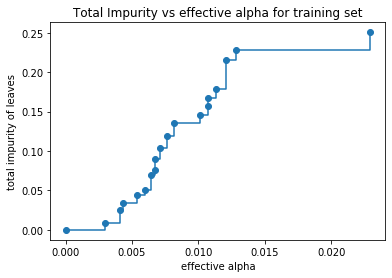

In [127]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [128]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17571481717687076


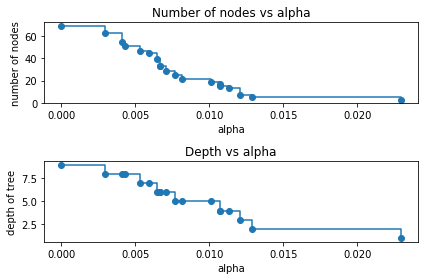

In [129]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

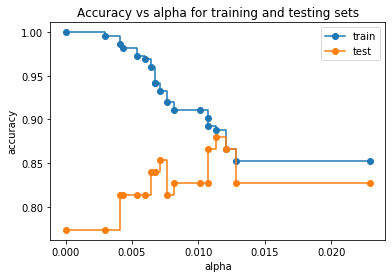

In [130]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [132]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
# clf = tree.DecisionTreeClassifier(random_state=0)
# clf = clf.fit(X_train, y_train)

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

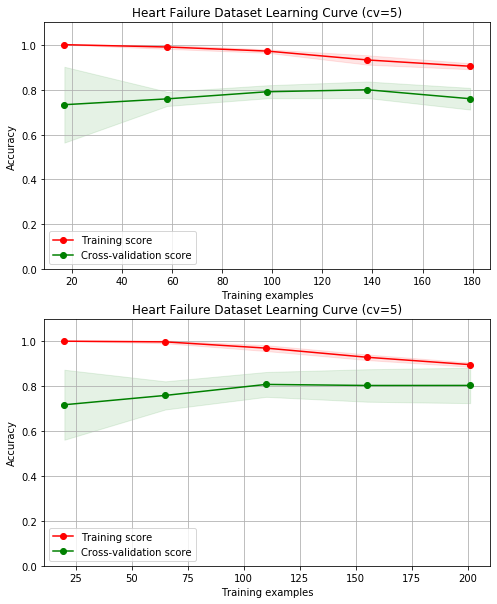

In [145]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
plot_learning_curve(tree.DecisionTreeClassifier(ccp_alpha=0.012, max_depth=7), 
                    'Heart Failure Dataset Learning Curve (cv=5)', 
                    X_train, y_train, axes=axes[0], ylim=(0.0, 1.1),
                    cv=5, n_jobs=4)
plot_learning_curve(tree.DecisionTreeClassifier(ccp_alpha=0.012, max_depth=7), 
                    'Heart Failure Dataset Learning Curve (cv=5)', 
                    X_train, y_train, axes=axes[1], ylim=(0.0, 1.1),
                    cv=10, n_jobs=4)

In [149]:
t, x = dtree_grid_search(X_train,y_train,X_test, 10)

In [150]:
t

{'criterion': 'entropy', 'max_depth': 4}

In [151]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, x)
metrics.auc(fpr, tpr)

0.8206018518518519

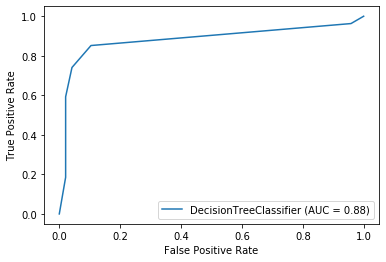

In [14]:
metrics.plot_roc_curve(clf, X_test, y_test)

In [15]:
clf.score(X_test, y_test)

0.88

In [16]:
for i in np.linspace(0.005, 0.02, 10):
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    # clf = tree.DecisionTreeClassifier(random_state=0)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.score(X_test, y_test))

0.8133333333333334
0.84
0.8266666666666667
0.8266666666666667
0.88
0.8266666666666667
0.8266666666666667
0.8266666666666667
0.8266666666666667
0.8266666666666667


3
4
5
6


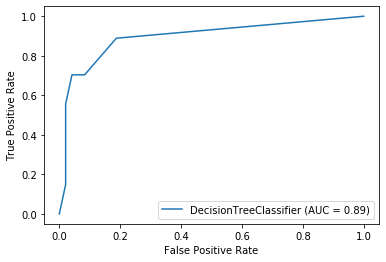

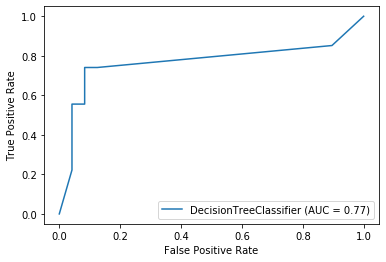

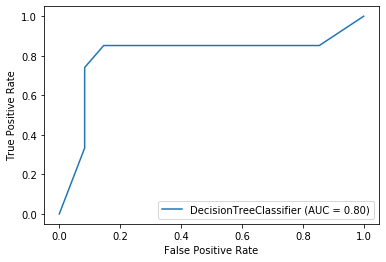

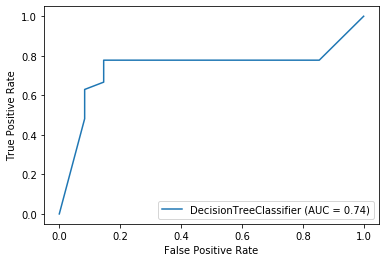

In [104]:
for i in range(3, 7):
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.0, max_depth=i)
    # clf = tree.DecisionTreeClassifier(random_state=0)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(i)
    metrics.plot_roc_curve(clf, X_test, y_test)

### Obesity

In [215]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [216]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [217]:
clfs = {c:LabelEncoder() for c in ['Gender', 'family_history_with_overweight',
                                   'FAVC', 'CAEC', 'SMOKE', 
                                   'SCC','CALC', 'MTRANS', 'NObeyesdad']}

for col, clf in clfs.items():
    df[col] = clfs[col].fit_transform(df[col])

In [218]:
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,
                                                    random_state=0)

clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

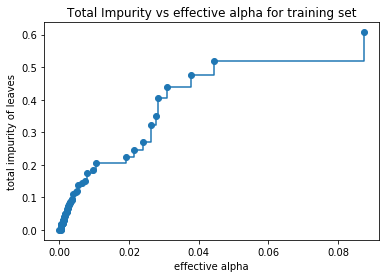

In [219]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12436365514894243


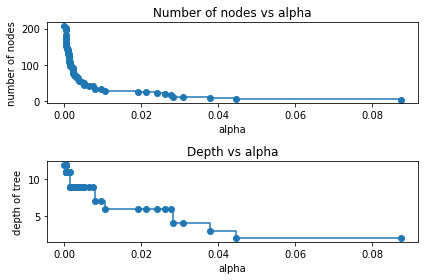

In [220]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

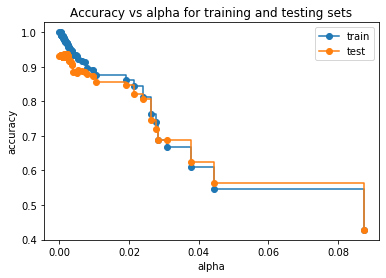

In [221]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [232]:
t, x = dtree_grid_search(X_train, y_train, X_test, y_test, 0.005, 5)

0.946969696969697


In [233]:
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
x = label_binarize(x, classes=[0, 1, 2, 3, 4, 5, 6])

(-0.05, 1.0)

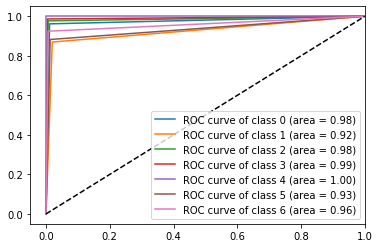

In [234]:
n_classes = 7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], x[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])

In [235]:
np.mean(list(roc_auc.values()))

0.9670932661816497

In [225]:
t

{'criterion': 'entropy', 'max_depth': 9}

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py'>

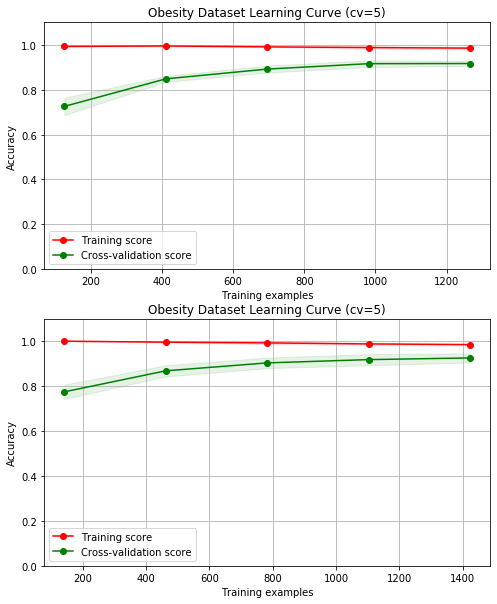

In [229]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
plot_learning_curve(tree.DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9), 
                    'Obesity Dataset Learning Curve (cv=5)', 
                    X_train, y_train, axes=axes[0], ylim=(0.0, 1.1),
                    cv=5, n_jobs=4)
plot_learning_curve(tree.DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9), 
                    'Obesity Dataset Learning Curve (cv=5)', 
                    X_train, y_train, axes=axes[1], ylim=(0.0, 1.1),
                    cv=10, n_jobs=4)